In [70]:
#36
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import KFold
#Loading data
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file('ratings.csv', reader = reader)


def get_precision_recall(tup, t):
    threshold = 3
    G = set([record[0] for record in filter(lambda x: x[1] >= threshold, tup)])
    if len(G) == 0:
        return False, 0, 0
    tup = sorted(tup, lambda x, y: int(y[2] - x[2]))
    S = set([x[0] for x in tup[: t]])
    inter = G & S
    precision = float(len(inter)) / len(S)
    recall = float(len(inter)) / len(G)
    return True, precision, recall

#Use 10-fold
n_splits = 10
kf = KFold(n_splits = n_splits)
#Define optimal k
k = 25
#Set Algorithm
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(k, sim_options = sim_options)
rmse = 0
t_range = range(1,26)

tItem_precision_knn = []
tItem_recall_knn = []
for t in t_range:
    users_precision_list = []
    users_recall_list = []
    for trainset, testset in kf.split(data):
        #Train the filter
        algo.fit(trainset)
        #Get the test data
        #Make prediction
        prediction = algo.test(testset)
        content = dict()
        for (user, item, r_ui, est, valid) in prediction:
            if 'reason' in valid: # meaning this item is not valid
                continue
            info_set = (item, r_ui, est)
            if user in content:
                content[user].append(info_set)
            else:
                content[user] = [info_set]
        count = 0
        user_precision = 0
        user_recall = 0
        for key in content:
            if len(content[key]) >= t:
                flag, precision, recall = get_precision_recall(content[key], t)
                if not flag: 
                    continue
                count += 1
                user_precision += precision
                user_recall += recall

        users_precision_list.append(user_precision / count)
        users_recall_list.append(user_recall / count)
    tItem_precision_knn.append(sum(users_precision_list) / n_splits)
    tItem_recall_knn.append(sum(users_recall_list) / n_splits)
    print('finished at t = ', t)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
('finished at t = ', 1)
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done comp

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
('finished at t = ', 11)
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pea

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
('finished at t = ', 21)
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done com

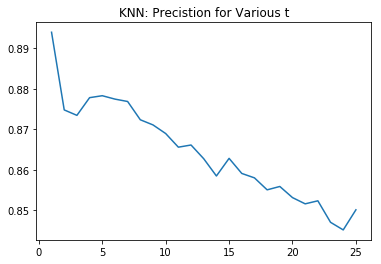

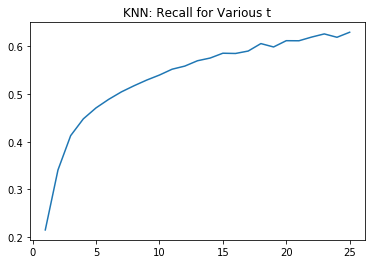

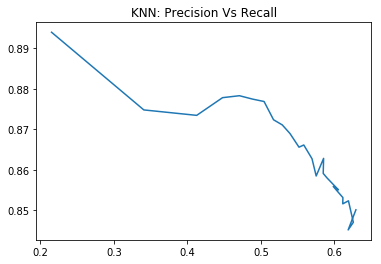

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ts = range(1, 26)

plt.plot(ts, tItem_precision_knn)
plt.title("KNN: Precistion for Various t")
plt.show()

plt.plot(ts, tItem_recall_knn)
plt.title("KNN: Recall for Various t")
plt.show()

plt.plot(tItem_recall_knn, tItem_precision_knn)
plt.title("KNN: Precision Vs Recall")
plt.show()

In [72]:
#37
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.prediction_algorithms.matrix_factorization import NMF

#Loading data
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file('ratings.csv', reader = reader)


def get_precision_recall(tup, t):
    threshold = 3
    G = set([record[0] for record in filter(lambda x: x[1] >= threshold, tup)])
    if len(G) == 0:
        return False, 0, 0
    tup = sorted(tup, lambda x, y: int(y[2] - x[2]))
    S = set([x[0] for x in tup[: t]])
    inter = G & S
    precision = float(len(inter)) / len(S)
    recall = float(len(inter)) / len(G)
    return True, precision, recall

#Use 10-fold
n_splits = 10
kf = KFold(n_splits = n_splits)
#Define optimal k
k = 20
#Set Algorithm
algo =  NMF(n_factors=k, biased=False, random_state=42)
t_range = range(1,26)

tItem_precision_nmf = []
tItem_recall_nmf = []
for t in t_range:
    users_precision_list = []
    users_recall_list = []
    for trainset, testset in kf.split(data):
        #Train the filter
        algo.fit(trainset)
        #Get the test data
        #Make prediction
        prediction = algo.test(testset)
        content = dict()
        for (user, item, r_ui, est, valid) in prediction:
            if 'reason' in valid: # meaning this item is not valid
                continue
            info_set = (item, r_ui, est)
            if user in content:
                content[user].append(info_set)
            else:
                content[user] = [info_set]
        count = 0
        user_precision = 0
        user_recall = 0
        for key in content:
            if len(content[key]) >= t:
                flag, precision, recall = get_precision_recall(content[key], t)
                if not flag: 
                    continue
                count += 1
                user_precision += precision
                user_recall += recall

        users_precision_list.append(user_precision / count)
        users_recall_list.append(user_recall / count)
    tItem_precision_nmf.append(sum(users_precision_list) / n_splits)
    tItem_recall_nmf.append(sum(users_recall_list) / n_splits)
    print('finished at t = ', t)

('finished at t = ', 1)
('finished at t = ', 2)
('finished at t = ', 3)
('finished at t = ', 4)
('finished at t = ', 5)
('finished at t = ', 6)
('finished at t = ', 7)
('finished at t = ', 8)
('finished at t = ', 9)
('finished at t = ', 10)
('finished at t = ', 11)
('finished at t = ', 12)
('finished at t = ', 13)
('finished at t = ', 14)
('finished at t = ', 15)
('finished at t = ', 16)
('finished at t = ', 17)
('finished at t = ', 18)
('finished at t = ', 19)
('finished at t = ', 20)
('finished at t = ', 21)
('finished at t = ', 22)
('finished at t = ', 23)
('finished at t = ', 24)
('finished at t = ', 25)


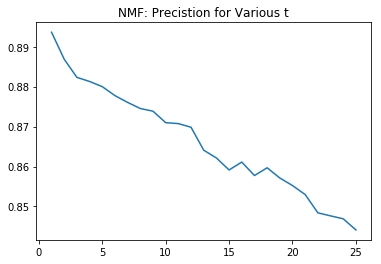

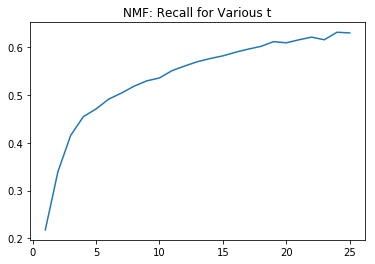

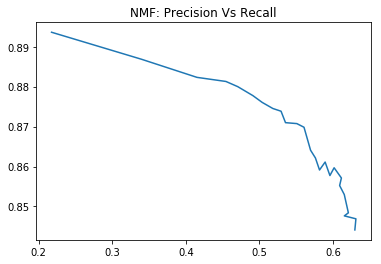

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ts = range(1, 26)

plt.plot(ts, tItem_precision_nmf)
plt.title("NMF: Precistion for Various t")
plt.show()

plt.plot(ts, tItem_recall_nmf)
plt.title("NMF: Recall for Various t")
plt.show()

plt.plot(tItem_recall_nmf, tItem_precision_nmf)
plt.title("NMF: Precision Vs Recall")
plt.show()

In [74]:
#38
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.prediction_algorithms.matrix_factorization import SVD

#Loading data
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file('ratings.csv', reader = reader)


def get_precision_recall(tup, t):
    threshold = 3
    G = set([record[0] for record in filter(lambda x: x[1] >= threshold, tup)])
    if len(G) == 0:
        return False, 0, 0
    tup = sorted(tup, lambda x, y: int(y[2] - x[2]))
    S = set([x[0] for x in tup[: t]])
    inter = G & S
    precision = float(len(inter)) / len(S)
    recall = float(len(inter)) / len(G)
    return True, precision, recall

#Use 10-fold
n_splits = 10
kf = KFold(n_splits = n_splits)
#Define optimal k
k = 7
#Set Algorithm
algo = SVD(n_factors=k, biased=False, random_state=42)
t_range = range(1,26)

tItem_precision_mf = []
tItem_recall_mf = []
for t in t_range:
    users_precision_list = []
    users_recall_list = []
    for trainset, testset in kf.split(data):
        #Train the filter
        algo.fit(trainset)
        #Get the test data
        #Make prediction
        prediction = algo.test(testset)
        content = dict()
        for (user, item, r_ui, est, valid) in prediction:
            if 'reason' in valid: # meaning this item is not valid
                continue
            info_set = (item, r_ui, est)
            if user in content:
                content[user].append(info_set)
            else:
                content[user] = [info_set]
        count = 0
        user_precision = 0
        user_recall = 0
        for key in content:
            if len(content[key]) >= t:
                flag, precision, recall = get_precision_recall(content[key], t)
                if not flag: 
                    continue
                count += 1
                user_precision += precision
                user_recall += recall

        users_precision_list.append(user_precision / count)
        users_recall_list.append(user_recall / count)
    tItem_precision_mf.append(sum(users_precision_list) / n_splits)
    tItem_recall_mf.append(sum(users_recall_list) / n_splits)
    print('finished at t = ', t)

('finished at t = ', 1)
('finished at t = ', 2)
('finished at t = ', 3)
('finished at t = ', 4)
('finished at t = ', 5)
('finished at t = ', 6)
('finished at t = ', 7)
('finished at t = ', 8)
('finished at t = ', 9)
('finished at t = ', 10)
('finished at t = ', 11)
('finished at t = ', 12)
('finished at t = ', 13)
('finished at t = ', 14)
('finished at t = ', 15)
('finished at t = ', 16)
('finished at t = ', 17)
('finished at t = ', 18)
('finished at t = ', 19)
('finished at t = ', 20)
('finished at t = ', 21)
('finished at t = ', 22)
('finished at t = ', 23)
('finished at t = ', 24)
('finished at t = ', 25)


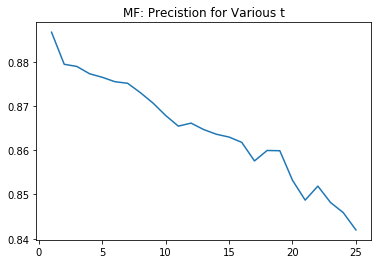

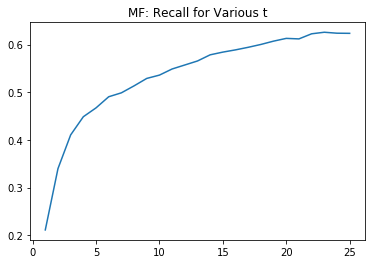

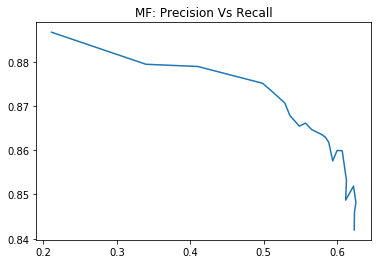

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ts = range(1, 26)

plt.plot(ts, tItem_precision_mf)
plt.title("MF: Precistion for Various t")
plt.show()

plt.plot(ts, tItem_recall_mf)
plt.title("MF: Recall for Various t")
plt.show()

plt.plot(tItem_recall_mf, tItem_precision_mf)
plt.title("MF: Precision Vs Recall")
plt.show()

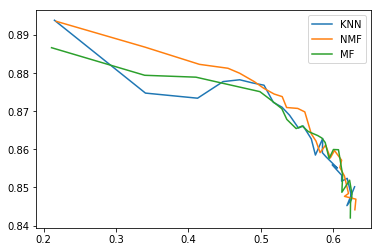

In [77]:
plt.plot(tItem_recall_knn, tItem_precision_knn, label='KNN')
plt.plot(tItem_recall_nmf, tItem_precision_nmf, label='NMF')
plt.plot(tItem_recall_mf, tItem_precision_mf, label='MF')
plt.legend()
plt.show()